In [1]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import cv2 

# 정규분포
<img src=data/Normal_Distribution.png width=300>

In [4]:
sp.norm(0,1).pdf(0.2) # 평균이 0이고 표준편차가 1일 때 0.2일 확률

0.3910426939754559

In [7]:
sp.norm(78,1).pdf(90) # 평균이 78이고 표준편차가 1일 때 90일 확률, 거의 78점에 있다

2.1463837356630605e-32

## 정규분포를 기반으로 모델 학습하기

(180, 187, 3)
9
255
19
b,g,r 각 평균 : 9.0 255.0 19.0
0.3520653267642995


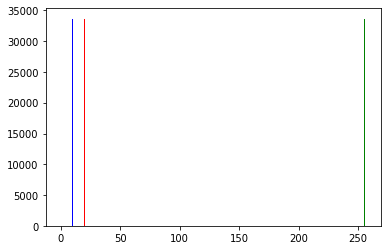

In [14]:
#모델학습
train = cv2.imread("./data/patch3.png")    
print(train.shape)
b,g,r = cv2.split(train)
hb = plt.hist(b.ravel(), 256, [0,256], color='b') 
hg = plt.hist(g.ravel(), 256, [0,256], color='g') 
hr = plt.hist(r.ravel(), 256, [0,256], color='r') 
maxb = (np.where( hb[0] == np.max(hb[0])) )[0][0]
maxg = (np.where( hg[0] == np.max(hg[0])) )[0][0]
maxr = (np.where( hr[0] == np.max(hr[0])) )[0][0]
print(maxb)
print(maxg)
print(maxr)
print("b,g,r 각 평균 :",np.mean(b), np.mean(g), np.mean(r))

t =7
p = sp.norm(0,1).pdf((9-7)/4 )
print(p)

AttributeError: 'numpy.float64' object has no attribute 'plot'

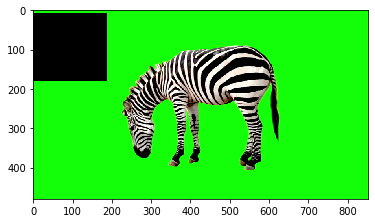

In [9]:
test = cv2.imread("./data/zoo.jpg")
for r in range(train.shape[0]) :
    for c in range(train.shape[1]) :        
        if  np.array_equal (test[r,c,:], [maxb, maxg, maxr]) :
            test[r, c, : ] = [0,0,0]               

plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB) )   

<class 'numpy.ndarray'>
(512, 512)
<class 'numpy.uint8'>
(512, 512)
(512, 512)
<class 'numpy.int32'>


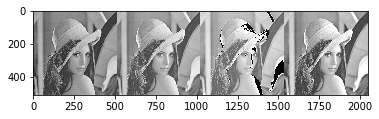

In [80]:
img = cv2.imread('./data/lena.png', cv2.IMREAD_GRAYSCALE)
print(type(img))
print(img.shape)# 512x512x3 이면 크기512 색 채널 3개 
print(type(img[0,0])) #<class 'numpy.uint8'> , 0~ 255 까지
img2 = img + 20
print(img2.shape)
img3 = img + 50 #img3 경우 색 값이 255가 넘어 오버플로우가 발생, 클래핑기법적용 ㄱㄱ
print(img3.shape)

#plt.imshow( np.hstack([img,img2, img3]), cmap='gray') 
plt.show()

# 32비트(4바이트) int형 변경
img4 = img.astype(np.float32)# float 형식으로 변경 
img4 *= 1.2
img4 = np.clip(img4,0,255).astype(np.uint8) # 값이 255보다 크면 255로 클래핑 하라
#img4 = img.astype(np.uint8)


print(type(imgint[0,0])) #<class 'numpy.int32'> , 4바이트 
plt.imshow( np.hstack([img,img2, img3,img4]), cmap='gray') #img3 경우 색 값이 255가 넘어 오버플로우가 발생, 클래핑기법적용 ㄱㄱ
plt.show()

In [54]:
a = np.array([[240,240],[240,240]], dtype='uint8')
b = a+10

print(a.shape)
print(a[0])
print(b.shape)
print(b[0])

a = np.array([250, 20 ,240], dtype='int')
b = a+10

print(a.shape)

c = np.clip(b,0,255)
print(c)

d = np.array(c, dtype='uint8')
print(d)

(2, 2)
[240 240]
(2, 2)
[250 250]
(3,)
[255  30 250]
[255  30 250]


In [108]:
#리스트 컴프렌션
lut_1 = [x for x in range(10)]
print(lut_1)

lut_2 = [x+5 for x in range(10)]
print(lut_2)

lut_3 = [9 if x > 9 else x for x in range(20) ] # x가 9보다 작으면 9를 반환 , else면 x를 반환
print(lut_3)

lut_4 = np.clip(lut_2, 0 , 9)
print(lut_4)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
[5 6 7 8 9 9 9 9 9 9]


In [111]:
import pandas as pd
test_df = pd.DataFrame()

In [119]:
def addlut(op):
    return [255 if x+op > 255 else x for x in range(255) ]

def mullut(op):
    return [255 if x*op > 255 else x for x in range(255) ]
